In [1]:
# ensure classes imported from .py files are dynamically updated
%load_ext autoreload
%autoreload 2

# plot matplots nicely
%matplotlib inline  

In [2]:
import numpy as np
import pandas as pd
import datetime
import glob
import xarray as xr
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from climate_drought import config, drought_indices as dri, utils

#pd.set_option('display.max_rows', 500)


C:\Users\eejco\pixalytics\Climate-drought\src\climate-indices\src\climate_indices\utils.py:149: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def reshape_to_2d(
C:\Users\eejco\pixalytics\Climate-drought\src\climate-indices\src\climate_indices\utils.py:199: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def reshape_to_divs_years_months(
C:\Users\eejco\pixalytics\C

In [6]:
aa = config.AnalysisArgs(latitude=52.5,longitude=1.25,start_date='20200101',end_date='20200303')
cf = config.Config(outdir= 'output',indir='input',verbose=False)

In [11]:
gdo = dri.SPI_GDO(cf,aa)

2023-05-16  17:16:09 INFO Successfully obtained URL for GDO file with year: 2020, prod_code spg03


In [12]:
gdo.download()

2023-05-16  17:16:16 INFO Downloaded file from GDO: input/spg03/spg03_m_wld_20200101_20201201_m.nc


1

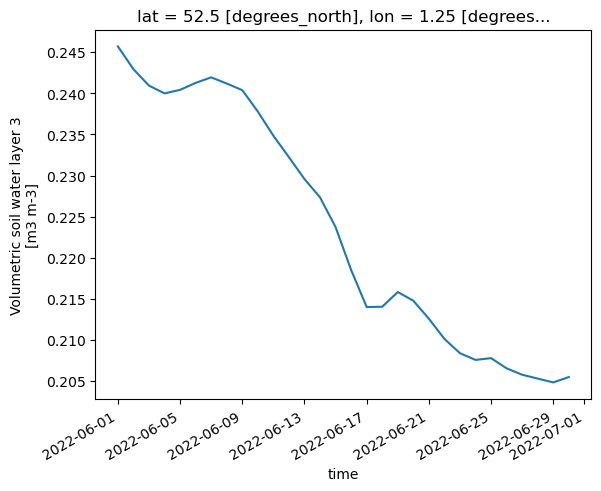

In [5]:
    with xr.open_dataset('../archive/soilwater_20200101-20221231_52.5_1.25_daily_20226.nc') as ds:
    ds.swvl3.plot()

In [3]:
aa = config.AnalysisArgs(latitude=52.5,longitude=1.25,start_date='20200101',end_date='20200303')
cf = config.Config(outdir= 'output',indir='input',verbose=False)

In [4]:
sma = dri.SMA_ECMWF(cf,aa)

In [5]:
sma.download()

2023-05-12  08:45:52 INFO Downloaded file 'output\soilwater_19850101-20221231_52.5_1.25_monthly.nc' already exists.
2023-05-12  08:45:52 INFO Initiating download of ERA5 data.
2023-05-12  08:45:52 INFO Variables to be downloaded: volumetric_soil_water_layer_1, volumetric_soil_water_layer_2, volumetric_soil_water_layer_3, volumetric_soil_water_layer_4.
2023-05-12  08:45:52 INFO Downloading daily ERA data for 2020-01-01 2020-03-03 for [52.6, 1.15, 52.4, 1.35]
2023-05-12 08:45:53,499 INFO Welcome to the CDS
2023-05-12  08:45:53 INFO Welcome to the CDS
2023-05-12 08:45:53,501 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/tasks/services/tool/toolbox/orchestrator/workflow/clientid-e97874053b124e94868736b1dee6e40b
2023-05-12  08:45:53 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/tasks/services/tool/toolbox/orchestrator/workflow/clientid-e97874053b124e94868736b1dee6e40b
2023-05-12 08:45:53,771 INFO Request is completed
2023-05-12  08:45:53 INFO Request is

Downloaded data was saved to 'output\soilwater_20200101-20200303_52.5_1.25_daily.nc'.


['output\\soilwater_19850101-20221231_52.5_1.25_monthly.nc',
 'output\\soilwater_20200101-20200303_52.5_1.25_daily.nc']

In [6]:
sma.process()

2023-05-12  08:46:23 INFO Initiating processing of ERA5 soil water data.
2023-05-12  08:46:23 INFO Completed processing of ERA5 soil water data.


,swvl3,swvl2,swvl1,swvl4,zscore_swvl1,zscore_swvl2,zscore_swvl3,zscore_swvl4
2020-01-01,0.371177,0.358258,0.358562,0.340660,1.096323,1.107641,1.558668,1.076162
2020-01-11,0.370922,0.375746,0.371143,0.345755,1.361337,1.440569,1.553805,1.302586
2020-01-21,0.369004,0.357796,0.354335,0.350933,1.007272,1.098850,1.517325,1.532645
2020-02-01,0.363065,0.352898,0.351249,0.353647,0.942268,1.005601,1.404332,1.653233
2020-02-11,0.361240,0.367762,0.367251,0.354868,1.279355,1.288575,1.369614,1.707485
2020-02-21,0.366362,0.373351,0.372696,0.356412,1.394055,1.394980,1.467059,1.776099
2020-03-01,0.369733,0.367381,0.363993,0.358751,1.210719,1.281330,1.531192,1.880044
2020-03-11,0.362950,0.342669,0.338914,0.360301,0.682434,0.810866,1.402142,1.948886
2020-03-21,0.348131,0.308143,0.297402,0.360088,-0.192032,0.153559,1.120240,1.939415


In [18]:
sma.process()

2023-05-10  18:39:14 INFO Initiating processing of ERA5 soil water data.
2023-05-10  18:39:14 INFO Completed processing of ERA5 soil water data.


,swvl1,swvl4,swvl3,swvl2,zscore_swvl1,zscore_swvl2,zscore_swvl3,zscore_swvl4
2020-01-01,0.358562,0.340660,0.371177,0.358258,1.096323,1.107641,1.558668,1.076162
2020-01-11,0.371143,0.345755,0.370922,0.375746,1.361337,1.440569,1.553805,1.302586
2020-01-21,0.354335,0.350933,0.369004,0.357796,1.007272,1.098850,1.517325,1.532645
2020-02-01,0.351249,0.353647,0.363065,0.352898,0.942268,1.005601,1.404332,1.653233
2020-02-11,0.367251,0.354868,0.361240,0.367762,1.279355,1.288575,1.369614,1.707485
2020-02-21,0.372696,0.356412,0.366362,0.373351,1.394055,1.394980,1.467059,1.776099
2020-03-01,0.363993,0.358751,0.369733,0.367381,1.210719,1.281330,1.531192,1.880044
2020-03-11,0.338914,0.360301,0.362950,0.342669,0.682434,0.810866,1.402142,1.948886
2020-03-21,0.297402,0.360088,0.348131,0.308143,-0.192032,0.153559,1.120240,1.939415


In [20]:
cdi = dri.CDI(cf,config.CDIArgs(aa.latitude,aa.longitude,aa.start_date,aa.end_date,spi_source='ECMWF',sma_source='ECMWF'))
cdi.download()

2023-05-10  18:39:59 INFO Downloaded file 'output\precip_19850101-20221231_52.5_1.25_monthly.nc' already exists.
2023-05-10  18:39:59 INFO Downloaded file 'output\soilwater_19850101-20221231_52.5_1.25_monthly.nc' already exists.
2023-05-10  18:39:59 INFO Initiating download of ERA5 data.
2023-05-10  18:39:59 INFO Variables to be downloaded: volumetric_soil_water_layer_1, volumetric_soil_water_layer_2, volumetric_soil_water_layer_3, volumetric_soil_water_layer_4.
2023-05-10  18:39:59 INFO Downloading daily ERA data for 2019-12-11 2020-03-03 for [52.6, 1.15, 52.4, 1.35]
2023-05-10 18:40:00,247 INFO Welcome to the CDS
2023-05-10  18:40:00 INFO Welcome to the CDS
2023-05-10 18:40:00,247 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/tasks/services/tool/toolbox/orchestrator/workflow/clientid-c0b08b4709d34e4b9c886dc67deacdea
2023-05-10  18:40:00 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/tasks/services/tool/toolbox/orchestrator/workflow/clientid-c0b08b

Downloaded data was saved to 'output\soilwater_20191211-20200303_52.5_1.25_daily.nc'.


In [21]:
cdi.process()

2023-05-11  08:20:05 INFO Computing Combined Drought Indicator...
2023-05-11  08:20:05 INFO Initiating processing of ERA5 daily data.
2023-05-11  08:20:05 INFO Input precipitation, 456 values: 0.000 0.005 
2023-05-11  08:20:05 INFO 

2023-05-11  08:20:08 DEBUG scaled values: 0.002 0.012
2023-05-11  08:20:10 DEBUG alphas: 9.687 17.504 betas: 0.000 0.001
2023-05-11  08:20:13 INFO SPI, 456 values: -3.046 2.676
2023-05-11  08:20:13 INFO Initiating processing of ERA5 soil water data.
2023-05-11  08:20:13 INFO Completed processing of ERA5 soil water data.
2023-05-11  08:20:15 INFO Completed processing of ERA5 CDI data.


,tp,spi,swvl1,swvl4,swvl3,swvl2,zscore_swvl1,zscore_swvl2,zscore_swvl3,zscore_swvl4,fpanv,CDI
2019-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-21,NaN,NaN,0.356192,0.309853,0.361637,0.360452,1.046386,1.149406,1.377175,-0.292672,NaN,NaN
2020-01-01,0.002574,1.778309,0.382426,0.315541,0.365232,0.381036,1.599021,1.541275,1.445565,-0.039930,NaN,NaN
2020-01-11,0.002574,1.778309,0.370322,0.329698,0.386056,0.377577,1.344044,1.475428,1.841725,0.589096,NaN,NaN
2020-01-21,0.002574,1.778309,0.358562,0.340660,0.371177,0.358258,1.096323,1.107641,1.558668,1.076162,NaN,NaN
2020-02-01,0.001882,0.928141,0.371143,0.345755,0.370922,0.375746,1.361337,1.440569,1.553805,1.302586,-1.371,0.0
2020-02-11,0.001882,0.928141,0.354335,0.350933,0.369004,0.357796,1.007272,1.098850,1.517325,1.532645,-1.078,0.0
2020-02-21,0.001882,0.928141,0.351249,0.353647,0.363065,0.352898,0.942268,1.005601,1.404332,1.653233,-0.787,0.0
2020-03-01,0.002690,1.106046,0.367251,0.354868,0.361240,0.367762,1.279355,1.288575,1.369614,1.707485,-1.231,0.0


In [14]:
cdi.data.dropna(how='all')

,tp,spi,smant,fpanv,CDI
2020-01-01,0.002574,1.778309,0.75,NaN,NaN
2020-01-11,0.002574,1.778309,0.56,NaN,NaN
2020-01-21,0.002574,1.778309,0.54,NaN,NaN
2020-02-01,0.001882,0.928141,0.19,-1.371,0.0
2020-02-11,0.001882,0.928141,-0.08,-1.078,0.0
...,...,...,...,...,...
2022-11-11,0.000909,-1.089360,-1.81,1.780,2.0
2022-11-21,0.000909,-1.089360,-0.40,NaN,NaN
2022-12-01,0.002387,-0.953641,NaN,NaN,NaN
2022-12-11,0.002387,-0.953641,NaN,NaN,NaN


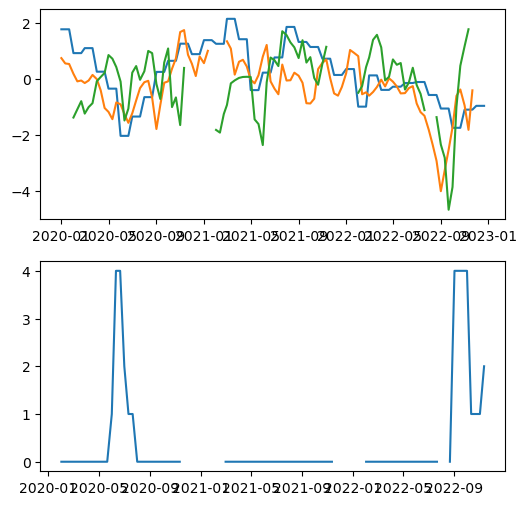

In [19]:
fig,ax = plt.subplots(2,1,figsize=(6,6))

ax[0].plot(cdi.data.spi)
ax[0].plot(cdi.data.smant)
ax[0].plot(cdi.data.fpanv)

ax[1].plot(cdi.data.CDI)

In [22]:
cdi = dri.CDI(cf,config.CDIArgs(aa.latitude,aa.longitude,aa.start_date,aa.end_date,sma_source='ECMWF',sma_var='zscore_swvl3'))
cdi.process()

2023-05-01  14:52:40 INFO Computing Combined Drought Indicator...
2023-05-01  14:52:40 INFO Initiating processing of ERA5 daily data.
2023-05-01  14:52:40 INFO Input precipitation, 456 values: 0.000 0.005 
2023-05-01  14:52:40 INFO 

2023-05-01  14:52:40 DEBUG scaled values: 0.002 0.012
2023-05-01  14:52:40 DEBUG alphas: 9.687 17.504 betas: 0.000 0.001
2023-05-01  14:52:40 INFO SPI, 456 values: -3.046 2.676
2023-05-01  14:52:40 INFO Initiating processing of ERA5 soil water data.
2023-05-01  14:52:40 INFO Completed processing of ERA5 soil water data.
2023-05-01  14:52:42 INFO Completed processing of ERA5 fAPAR data.
2023-05-01  14:52:42 INFO Completed processing of ERA5 CDI data.


,tp,spi,swvl2,swvl4,swvl3,swvl1,zscore_swvl1,zscore_swvl2,zscore_swvl3,zscore_swvl4,fpanv,CDI
2019-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,0.002574,1.760415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-11,0.002574,1.760415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-11,0.000909,-1.089360,0.331300,0.307727,0.236064,0.353820,0.998224,0.596497,-1.009529,-0.387874,1.78,2.0
2022-11-21,0.000909,-1.089360,0.370814,0.306952,0.274808,0.376866,1.483593,1.348706,-0.272406,-0.422276,NaN,NaN
2022-12-01,0.002387,-0.953641,0.366576,0.306847,0.314400,0.369212,1.322389,1.268030,0.480835,-0.426949,NaN,NaN
2022-12-11,0.002387,-0.953641,0.383465,0.308668,0.352771,0.382669,1.605801,1.589532,1.210864,-0.346117,NaN,NaN


<Axes: >

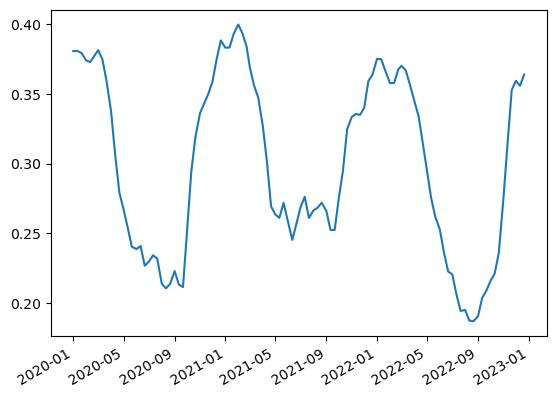

In [6]:
sma.data.swvl3.plot()

In [7]:
sdate_ts = pd.Timestamp(aa.start_date)
sdate_dk = sdate_ts.replace(day=utils.nearest_dekad(sdate_ts.day))
sdate_sma = sdate_dk - relativedelta(days=20)

In [8]:
def aa_new(required_sdate: pd.Timestamp) -> config.AnalysisArgs:
    """
    Helper function to quickly return modified arguments
    """
    # Makes sure start date is in dekads and the required format
    sdate = required_sdate.replace(day=utils.nearest_dekad(required_sdate.day))
    return config.AnalysisArgs(aa.latitude,aa.longitude,sdate.strftime('%Y%m%d'),aa.end_date)


In [10]:
tmp = dri.SMA_ECMWF(cf,aa_new(sdate_sma))

In [11]:
fpath = tmp.download_obj_hourly.download_file_path
fpath

'output\\soilwater_20191211-20221231_52.5_1.25_hourly.nc'

In [13]:
myfile='output/soilwater_20191211-20221231_52.5_1.25_hourly.nc'

In [15]:
xr.open_dataset(myfile).swvl3#.plot()

<xarray.DataArray 'swvl3' (time: 26808, latitude: 1, longitude: 1)>
[26808 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 1.15
  * latitude   (latitude) float32 52.4
  * time       (time) datetime64[ns] 2019-12-11T13:00:00 ... 2022-12-31T01:00:00
Attributes:
    units:      m**3 m**-3
    long_name:  Volumetric soil water layer 3

<Axes: >

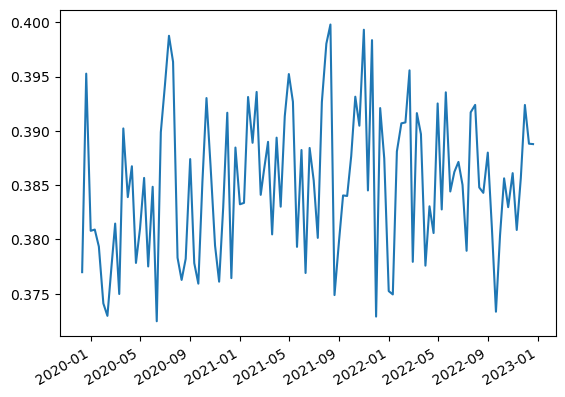

In [9]:
cdi.sma.data.swvl3.plot()

In [57]:
cdi.index_shortname(caps=False)

TypeError: 'str' object is not callable

In [54]:

cdi.download()
cdi.process()

2023-04-17  13:16:27 INFO Downloaded file 'output\precip_19850101-20221231_monthly_52.5_1.25.nc' already exists.
2023-04-17  13:16:27 INFO Downloaded files available.
2023-04-17  13:16:27 INFO Downloaded files available.
2023-04-17  13:16:27 INFO Computing Combined Drought Indicator...
2023-04-17  13:16:27 INFO Initiating processing of ERA5 daily data.
2023-04-17  13:16:27 INFO Input precipitation, 456 values: 0.000 0.005 
2023-04-17  13:16:27 INFO 

2023-04-17  13:16:27 DEBUG scaled values: 0.002 0.012
2023-04-17  13:16:27 DEBUG alphas: 9.687 17.504 betas: 0.000 0.001
2023-04-17  13:16:27 INFO SPI, 456 values: -3.046 2.676
2023-04-17  13:16:29 INFO Completed processing of ERA5 soil water data.
2023-04-17  13:16:31 INFO Completed processing of ERA5 fAPAR data.
2023-04-17  13:16:31 INFO Completed processing of ERA5 CDI data.


,tp,spi,smant,fpanv,CDI
2020-01-01,NaN,NaN,NaN,NaN,NaN
2020-01-11,NaN,NaN,NaN,NaN,NaN
2020-01-21,NaN,NaN,NaN,NaN,NaN
2020-02-01,0.001882,0.928141,NaN,NaN,NaN
2020-02-11,0.001882,0.928141,-0.08,-1.078,0.0
...,...,...,...,...,...
2022-11-11,0.000909,-1.089360,-1.81,1.780,2.0
2022-11-21,0.000909,-1.089360,-0.40,NaN,NaN
2022-12-01,0.002387,-0.953641,NaN,NaN,NaN
2022-12-11,0.002387,-0.953641,NaN,NaN,NaN


In [35]:
warns = []
for i,r in cdi.df_shifted.iterrows():
    spi_warn = r['spi'] < -1
    warns.append(r['spi'] < -1)

In [48]:
cdi.df_shifted.isna().any(axis=1)

2020-01-01     True
2020-01-11     True
2020-01-21     True
2020-02-01     True
2020-02-11    False
              ...  
2022-11-11    False
2022-11-21     True
2022-12-01     True
2022-12-11     True
2022-12-21     True
Length: 108, dtype: bool

In [53]:

def calc_cdi(r):
    spi_ = r['spi'] < -1
    sma_ = r['smant'] < -1
    fpr_ = r['fpanv'] < -1
    if r.isna().any():
        return np.nan
    elif spi_ and sma_ and fpr_:
        return 4
    elif spi_ and fpr_:
        return 3
    elif spi_ and sma_:
        return 2
    elif spi_:
        return 1
    else:
        return 0
    
cdi.df_shifted.apply(calc_cdi,axis=1)

2020-01-01    NaN
2020-01-11    NaN
2020-01-21    NaN
2020-02-01    NaN
2020-02-11    0.0
             ... 
2022-11-11    2.0
2022-11-21    NaN
2022-12-01    NaN
2022-12-11    NaN
2022-12-21    NaN
Length: 108, dtype: float64

In [14]:
(cdi.sma_shifted < -1).to_numpy().flatten()

array([False, False, False, False, False, False, False,  True,  True,
        True, False, False,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False, False, False, False])